In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry
import statsmodels.api as sm

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500


### Create dictionary in order to clean the name of the country
Different dataframes may contain the name of the country as an abbreviation in 2 or 3 letters

In [2]:
countries_abbr_to_name = {}
countries_abbr_to_name["UK"] = "United Kingdom"
countries_abbr_to_name["EL"] = "Greece"

for country in list(pycountry.countries):
    countries_abbr_to_name[country.alpha2] = country.name
    countries_abbr_to_name[country.alpha3] = country.name

### Create clean function which eliminates unneccesary columns and empty rows from the dataframes

In [3]:
def clean_gei_df(df_gei, countries_dict):
    clean_df = df_gei.iloc[:-6]
    clean_df = clean_df.replace(countries_dict)
    clean_df = clean_df[["Country", "Gender Equality Index", "Gender Wage Gap mean monthly earnings"]]
    clean_df = clean_df.rename(columns={"Gender Wage Gap mean monthly earnings": "gpg"})
    clean_df["gpg"] = clean_df["gpg"].str.replace("%", "")
    clean_df["gpg"] = clean_df["gpg"].astype(float)
    return clean_df

## Load source data into dataframes
The statistics for every year are stored in different csv-files

In [4]:
df_gei_2005 = pd.read_csv("../data/gender_equality_index_gpg/gender_equality_index_gpg_2005.csv", header = 1)
df_gei_2010 = pd.read_csv("../data/gender_equality_index_gpg/gender_equality_index_gpg_2010.csv", header = 1)
df_gei_2012 = pd.read_csv("../data/gender_equality_index_gpg/gender_equality_index_gpg_2012.csv", header = 1)
df_gei_2015 = pd.read_csv("../data/gender_equality_index_gpg/gender_equality_index_gpg_2015.csv", header = 1)
df_gei_2017 = pd.read_csv("../data/gender_equality_index_gpg/gender_equality_index_gpg_2017.csv", header = 1)
#df_gender_equality_index = pd.read_csv("../data/gender_equality_index_gpg_2017.csv", header = 1)

Cleaning the dataframes from unnecessary columns and empty rows

In [5]:
clean_gei_2005 = clean_gei_df(df_gei_2005, countries_abbr_to_name)
clean_gei_2005 = clean_gei_2005.iloc[:-2] # the dataframe for 2005 contains two more empty rows than the other df
clean_gei_2010 = clean_gei_df(df_gei_2010, countries_abbr_to_name)
clean_gei_2012 = clean_gei_df(df_gei_2012, countries_abbr_to_name)
clean_gei_2015 = clean_gei_df(df_gei_2015, countries_abbr_to_name)
clean_gei_2017 = clean_gei_df(df_gei_2017, countries_abbr_to_name)

Adding a new column with the correct year for every df

In [6]:
clean_gei_2005["Year"] = 2005
clean_gei_2010["Year"] = 2010
clean_gei_2012["Year"] = 2012
clean_gei_2015["Year"] = 2015
clean_gei_2017["Year"] = 2017

This is how one of the dataframes for each year looks like

In [7]:
clean_gei_2015.head()

,Country,Gender Equality Index,gpg,Year
0,EU-28,66.2,19.96,2015
1,Belgium,70.5,10.84,2015
2,Bulgaria,58.0,14.43,2015
3,Czech Republic,53.6,23.40,2015
4,Denmark,76.8,18.76,2015


## Concatenating the dataframes containing data for each year into one df with all years

In [8]:
df_list = [clean_gei_2005,
           clean_gei_2010,
           clean_gei_2012,
           clean_gei_2015,
           clean_gei_2017]

gei_2005_to_2017 = pd.concat(df_list, ignore_index = True)

In [9]:
gei_2005_to_2017

,Country,Gender Equality Index,gpg,Year
0,EU-28,62.0,39.16,2005
1,Belgium,66.0,12.47,2005
2,Bulgaria,56.0,12.77,2005
3,Czech Republic,53.6,24.28,2005
4,Denmark,74.6,21.27,2005
5,Germany,60.0,23.06,2005
6,Estonia,52.2,31.32,2005
7,Ireland,61.9,23.95,2005
8,Greece,46.8,23.78,2005
9,Spain,62.2,20.32,2005


Exporting the dataframe

In [10]:
gei_2005_to_2017.to_csv("../data/gender_equality_index_gpg/gender_equality_index_gpg_2005_to_2017.csv")

## Producing a regression plot of the gender pay gap vs. the gender equality index for all european states as well as the EU-28 for all 5 available years

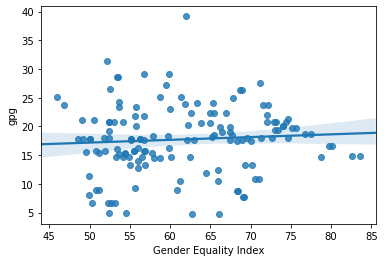

In [11]:
sns.regplot(x = gei_2005_to_2017["Gender Equality Index"], y = gei_2005_to_2017["gpg"])

## Gaining information about the linear regression

In [12]:
gei_2005_to_2017 = gei_2005_to_2017.assign(const=1)
lin_reg_gei = sm.OLS(gei_2005_to_2017["Gender Equality Index"],
                    gei_2005_to_2017[["const", "gpg"]]).fit()
lin_reg_gei.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Gender Equality Index   R-squared:                       0.005
Model:                               OLS   Adj. R-squared:                 -0.002
Method:                    Least Squares   F-statistic:                    0.7342
Date:                   Fri, 14 Feb 2020   Prob (F-statistic):              0.393
Time:                           12:03:46   Log-Likelihood:                -519.56
No. Observations:                    145   AIC:                             1043.
Df Residuals:                        143   BIC:                             1049.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.5314      2.322     25.636      0.000      54.941      64.122
gpg            0.1066      0.124      0.857      0.393      -0.139       0.352
==============================================================================
Omnibus:                       13.056   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.928
Skew:                           0.417   Prob(JB):                       0.0190
Kurtosis:                       2.214   Cond. No.                         59.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""